# <font color=green> Otimização de modelos através de hiperparâmetros
---

# ---------------------------------------Testando hiperparâmetros e analisando overfit---------------------------------------

    * Definir sobre max_depth;
    * Definir sobre a árvore de decisão ( DecisionTreeClassifier);
    * Mostrar gráficos com o seaborn;
    * Mostrar gráficos com matplotlib;
    * Definir hiperparâmetros.

In [1]:
#!pip install graphviz==0.9
#!pip install pydot
#!pip install seaborn==0.9.0

#!apt-get install graphviz

In [2]:
import pandas as pd
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import GroupKFold
import numpy as np


uri = "https://gist.githubusercontent.com/guilhermesilveira/e99a526b2e7ccc6c3b70f53db43a87d2/raw/1605fc74aa778066bf2e6695e24d53cf65f2f447/machine-learning-carros-simulacao.csv"
dados = pd.read_csv(uri).drop(columns=["Unnamed: 0"], axis=1)
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,18,35085.22134
1,40557.96,1,20,12622.05362
2,89627.50,0,12,11440.79806
3,95276.14,0,3,43167.32682
4,117384.68,1,4,12770.11290


In [3]:
# situação horrível de "azar" onde as classes estão ordenadas por padrão

dados_azar = dados.sort_values("vendido", ascending=True)
x_azar = dados_azar[["preco", "idade_do_modelo","km_por_ano"]]
y_azar = dados_azar["vendido"]

x = dados[["preco", "idade_do_modelo","km_por_ano"]]
y = dados["vendido"]

dados_azar.head()

,preco,vendido,idade_do_modelo,km_por_ano
4999,74023.29,0,12,24812.80412
5322,84843.49,0,13,23095.63834
5319,83100.27,0,19,36240.72746
5316,87932.13,0,16,32249.56426
5315,77937.01,0,15,28414.50704


In [4]:
# gerando dados elatorios de modelo de carro para simulacao de agrupamento ao usar nosso estimador

SEED = 301
np.random.seed(SEED)
dados['modelo'] = dados.idade_do_modelo + np.random.randint(-2, 3, size=10000)
dados.modelo = dados.modelo + abs(dados.modelo.min()) + 1
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano,modelo
0,30941.02,1,18,35085.22134,18
1,40557.96,1,20,12622.05362,24
2,89627.50,0,12,11440.79806,14
3,95276.14,0,3,43167.32682,6
4,117384.68,1,4,12770.11290,5


In [5]:
SEED = 301
np.random.seed(SEED)

modelo = DummyClassifier()
results = cross_validate(modelo, x_azar, y_azar, cv = 10, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
print("Accuracy com dummy stratified, 10 = [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))

Accuracy com dummy stratified, 10 = [58.00, 58.00]


## TESTADO HIPERPARÂMETROS EM UMA DIMENSÃO

In [6]:
def roda_arvore_de_decisao(max_depth):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth)
  results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True)
  train_score = results['train_score'].mean() * 100
  test_score = results['test_score'].mean() * 100
  print("Arvore max_depth = %d, treino = %.2f, teste = %.2f" % (max_depth, train_score, test_score))
  tabela = [max_depth, train_score, test_score]
  return tabela
  
resultados = [roda_arvore_de_decisao(i) for i in range(1,33)]
resultados = pd.DataFrame(resultados, columns= ["max_depth","train","test"])
resultados.head()

Arvore max_depth = 1, treino = 75.79, teste = 75.78
Arvore max_depth = 2, treino = 75.79, teste = 75.78
Arvore max_depth = 3, treino = 78.75, teste = 78.67
Arvore max_depth = 4, treino = 78.79, teste = 78.63
Arvore max_depth = 5, treino = 78.94, teste = 78.56
Arvore max_depth = 6, treino = 79.17, teste = 78.12
Arvore max_depth = 7, treino = 79.50, teste = 77.96
Arvore max_depth = 8, treino = 79.89, teste = 77.86
Arvore max_depth = 9, treino = 80.46, teste = 77.38
Arvore max_depth = 10, treino = 81.16, teste = 77.19
Arvore max_depth = 11, treino = 82.03, teste = 76.97
Arvore max_depth = 12, treino = 82.89, teste = 76.49
Arvore max_depth = 13, treino = 83.95, teste = 75.81
Arvore max_depth = 14, treino = 85.03, teste = 75.66
Arvore max_depth = 15, treino = 86.14, teste = 75.16
Arvore max_depth = 16, treino = 87.19, teste = 75.11
Arvore max_depth = 17, treino = 88.31, teste = 74.74
Arvore max_depth = 18, treino = 89.26, teste = 74.33
Arvore max_depth = 19, treino = 90.32, teste = 74.34
Ar

,max_depth,train,test
0,1,75.791169,75.784219
1,2,75.791169,75.784219
2,3,78.750993,78.672633
3,4,78.787628,78.632803
4,5,78.941007,78.555912


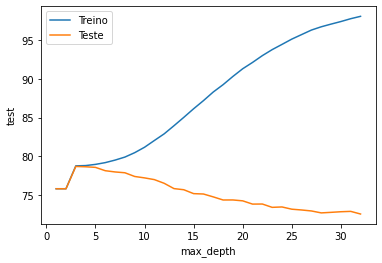

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(x = "max_depth", y = "train", data = resultados)
sns.lineplot(x = "max_depth", y = "test", data = resultados)
plt.legend(["Treino", "Teste"])

In [8]:
resultados.sort_values("test", ascending=False).head()

,max_depth,train,test
2,3,78.750993,78.672633
3,4,78.787628,78.632803
4,5,78.941007,78.555912
5,6,79.170115,78.123266
6,7,79.496806,77.963185


# ---------------------------------------2 Dimensões---------------------------------------

    * Definir os elementos mínimos em uma árvore de decisão;
    * Utilizar o min_samples_leaf para treino;
    * O que é corr do pandas;

### EXPLORANDO HIPERPARÂMETROS EM 2 DIMENSÕES

In [9]:
def roda_arvore_de_decisao(max_depth, min_samples_leaf):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
  results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True)
  train_score = results['train_score'].mean() * 100
  test_score = results['test_score'].mean() * 100
  print("Arvore max_depth = %d, min_samples_leaf = %d treino = %.2f, teste = %.2f" % (max_depth,min_samples_leaf, train_score, test_score))
  tabela = [max_depth, min_samples_leaf, train_score, test_score]
  return tabela


def busca():
    resultados = []
    for max_depth in range(1,33):
        for min_samples_leaf in [32, 64, 128, 256]:
            tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf)
            resultados.append(tabela)
    resultados = pd.DataFrame(resultados, columns= ["max_depth", "min_samples_leaf", "train","test"])
    return resultados

resultados = busca()
resultados.head()

Arvore max_depth = 1, min_samples_leaf = 32 treino = 75.79, teste = 75.78
Arvore max_depth = 1, min_samples_leaf = 64 treino = 75.79, teste = 75.78
Arvore max_depth = 1, min_samples_leaf = 128 treino = 75.79, teste = 75.78
Arvore max_depth = 1, min_samples_leaf = 256 treino = 75.79, teste = 75.78
Arvore max_depth = 2, min_samples_leaf = 32 treino = 75.79, teste = 75.78
Arvore max_depth = 2, min_samples_leaf = 64 treino = 75.79, teste = 75.78
Arvore max_depth = 2, min_samples_leaf = 128 treino = 75.79, teste = 75.78
Arvore max_depth = 2, min_samples_leaf = 256 treino = 75.79, teste = 75.78
Arvore max_depth = 3, min_samples_leaf = 32 treino = 78.75, teste = 78.67
Arvore max_depth = 3, min_samples_leaf = 64 treino = 78.75, teste = 78.67
Arvore max_depth = 3, min_samples_leaf = 128 treino = 78.75, teste = 78.67
Arvore max_depth = 3, min_samples_leaf = 256 treino = 78.75, teste = 78.67
Arvore max_depth = 4, min_samples_leaf = 32 treino = 78.75, teste = 78.67
Arvore max_depth = 4, min_sample

,max_depth,min_samples_leaf,train,test
0,1,32,75.791169,75.784219
1,1,64,75.791169,75.784219
2,1,128,75.791169,75.784219
3,1,256,75.791169,75.784219
4,2,32,75.791169,75.784219


In [10]:
resultados.sort_values("test", ascending=False).head()

,max_depth,min_samples_leaf,train,test
15,4,256,78.750993,78.672633
12,4,32,78.750993,78.672633
14,4,128,78.750993,78.672633
13,4,64,78.750993,78.672633
8,3,32,78.750993,78.672633


* Como testar tudo consome muito processamento, escolhemos aqueles 4 valores (32, 64, 128, 256) no primeiro eixo e 32 no segundo para realizar os teste. Mas será que tem algum outro espaço entre os 4 em que poderíamos ter testado e obter um resultado melhor ?
     * Uma maneira de tentar visualizar isso é procurar uma relaçao entre o resultado de treino ou teste para com os parâmetros utilizados 
     * O próprio pandas já faz isso pra gente
     * Abaixosegue algumas maneiras de visualizarmos isso

In [11]:
corr = resultados.corr()

<AxesSubplot:>

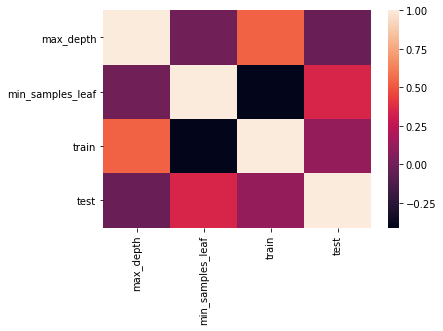

In [12]:
sns.heatmap(corr)

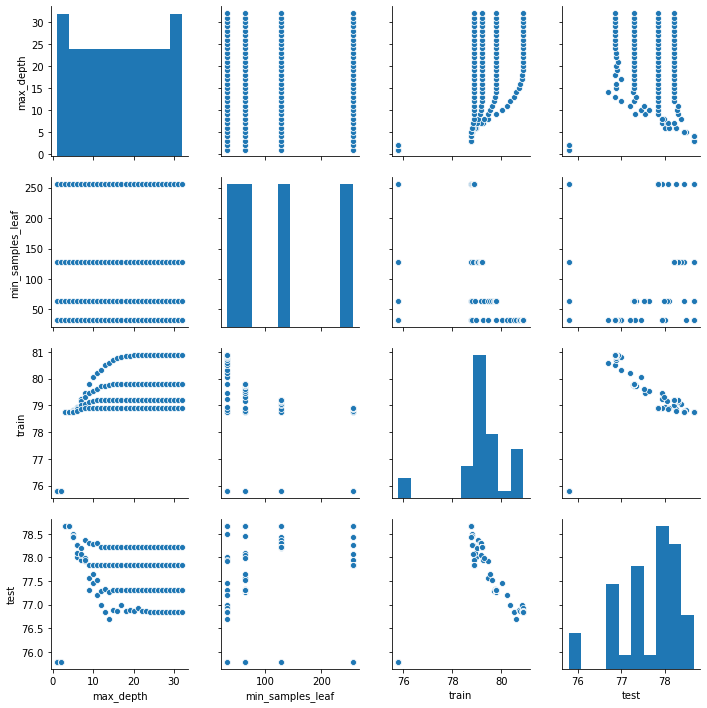

In [17]:
sns.pairplot(resultados)

* Quando o max_depth cresce: treino aumenta e teste diminui
* Quando o min_samples_leaf cresce: treino diminui e teste aumenta

* Logo, vou rodar o teste dnv, porém com valores que tendem à melhores resultados

In [18]:
def busca():
    resultados = []
    for max_depth in range(1,33):
        for min_samples_leaf in [128,192,256,512]:
            tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf)
            resultados.append(tabela)
    resultados = pd.DataFrame(resultados, columns= ["max_depth", "min_samples_leaf", "train","test"])
    return resultados

busca()

Arvore max_depth = 1, min_samples_leaf = 128 treino = 75.79, teste = 75.78
Arvore max_depth = 1, min_samples_leaf = 192 treino = 75.79, teste = 75.78
Arvore max_depth = 1, min_samples_leaf = 256 treino = 75.79, teste = 75.78
Arvore max_depth = 1, min_samples_leaf = 512 treino = 75.79, teste = 75.78
Arvore max_depth = 2, min_samples_leaf = 128 treino = 75.79, teste = 75.78
Arvore max_depth = 2, min_samples_leaf = 192 treino = 75.79, teste = 75.78
Arvore max_depth = 2, min_samples_leaf = 256 treino = 75.79, teste = 75.78
Arvore max_depth = 2, min_samples_leaf = 512 treino = 75.79, teste = 75.78
Arvore max_depth = 3, min_samples_leaf = 128 treino = 78.75, teste = 78.67
Arvore max_depth = 3, min_samples_leaf = 192 treino = 78.75, teste = 78.67
Arvore max_depth = 3, min_samples_leaf = 256 treino = 78.75, teste = 78.67
Arvore max_depth = 3, min_samples_leaf = 512 treino = 77.53, teste = 77.50
Arvore max_depth = 4, min_samples_leaf = 128 treino = 78.75, teste = 78.67
Arvore max_depth = 4, min

,max_depth,min_samples_leaf,train,test
0,1,128,75.791169,75.784219
1,1,192,75.791169,75.784219
2,1,256,75.791169,75.784219
3,1,512,75.791169,75.784219
4,2,128,75.791169,75.784219
...,...,...,...,...
123,31,512,77.526644,77.496637
124,32,128,79.212171,78.221828
125,32,192,79.012068,78.046313
126,32,256,78.898753,77.848502


In [19]:
resultados.sort_values("test", ascending=False).head()

,max_depth,min_samples_leaf,train,test
15,4,256,78.750993,78.672633
12,4,32,78.750993,78.672633
14,4,128,78.750993,78.672633
13,4,64,78.750993,78.672633
8,3,32,78.750993,78.672633


# ---------------------------------------3 + Dimensões---------------------------------------

    * Utilizar mais do que um hiperparâmetro
    * Gerar um gráfico com matplotlib;
    * O que é min_samples_split;

### Explorando 3 dimensões de hiperparâmetros

In [ ]:
def roda_arvore_de_decisao(max_depth, min_samples_leaf, min_samples_split):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split)
  results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True)
  fit_time = results['fit_time'].mean()
  score_time = results['score_time'].mean()
  train_score = results['train_score'].mean() * 100
  test_score = results['test_score'].mean() * 100
  #print("Arvore max_depth = %d, min_samples_leaf = %d min_samples_split = %d treino = %.2f, teste = %.2f" % (max_depth,min_samples_leaf,min_samples_split, train_score, test_score))
  tabela = [max_depth, min_samples_leaf,min_samples_split, train_score, test_score, fit_time, score_time]
  return tabela


def busca():
    resultados = []
    for max_depth in range(1,33):
        for min_samples_leaf in [32, 64, 128, 256]:
            for min_samples_split in [32, 64, 128, 256]:
                tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf, min_samples_split)
                resultados.append(tabela)
    resultados = pd.DataFrame(resultados, columns= ["max_depth", "min_samples_leaf", "min_samples_split", "train","test", "fit_time", "score_time"])
    return resultados

resultados = busca()
resultados.head()

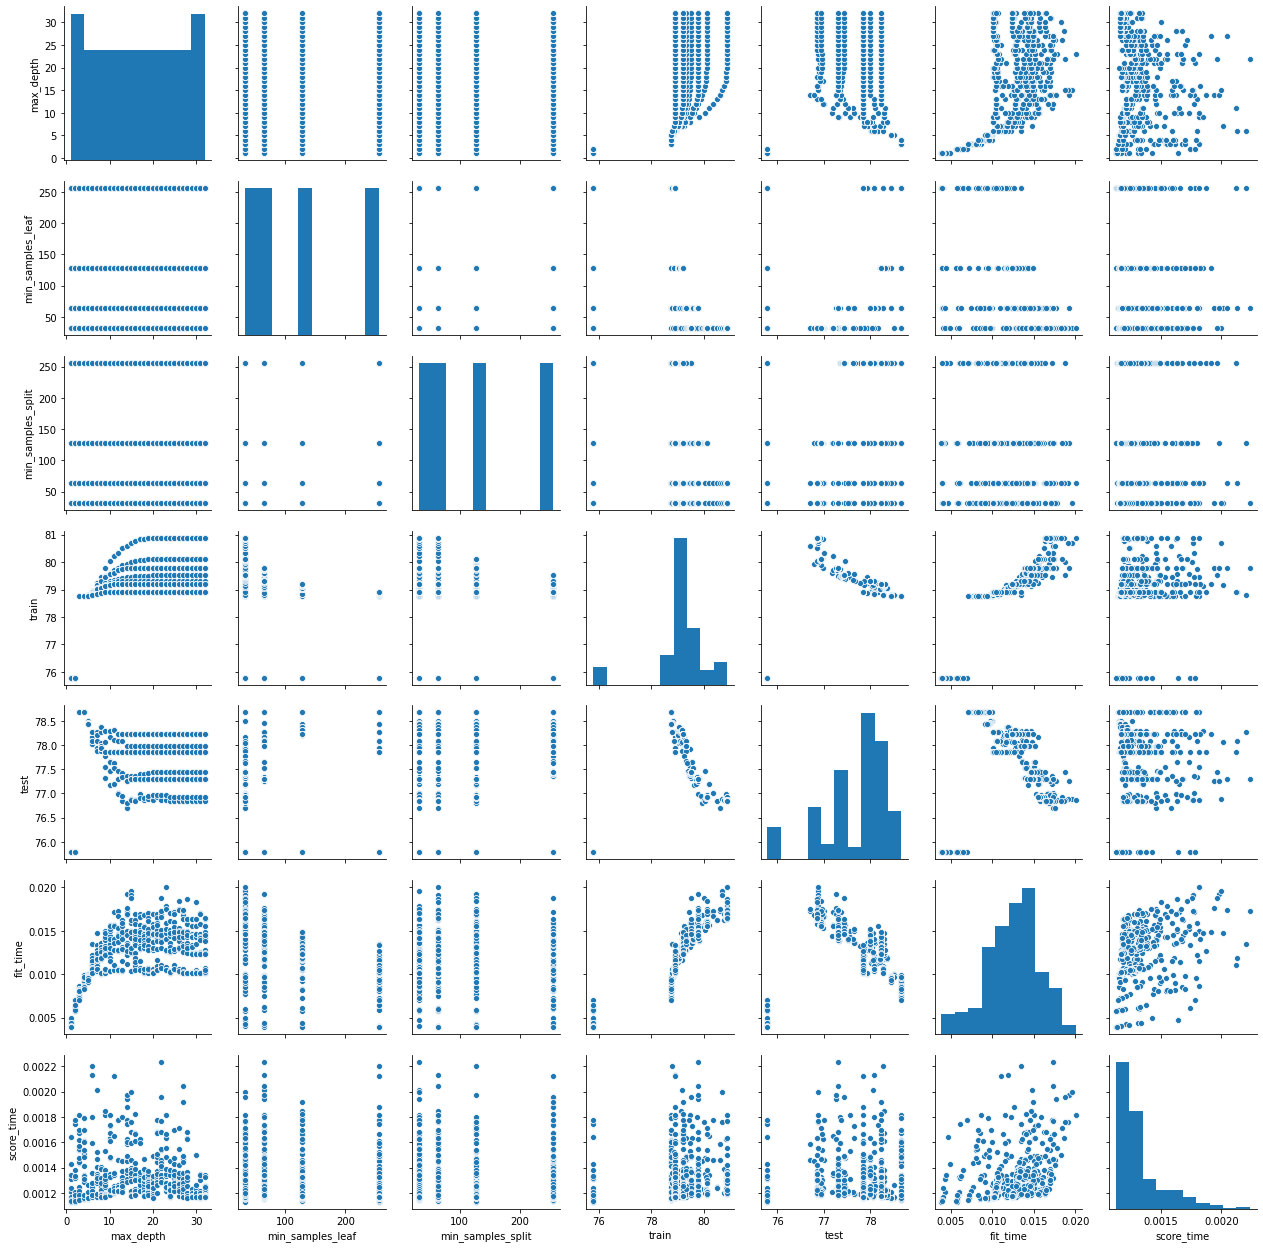

In [25]:
sns.pairplot(resultados)

In [26]:
resultados.sort_values("test", ascending=False).head()

,max_depth,min_samples_leaf,min_samples_split,train,test,fit_time,score_time
63,4,256,256,78.750993,78.672633,0.008322,0.001188
48,4,32,32,78.750993,78.672633,0.008505,0.001156
34,3,32,128,78.750993,78.672633,0.007702,0.001244
35,3,32,256,78.750993,78.672633,0.008043,0.001542
36,3,64,32,78.750993,78.672633,0.008650,0.001818


# ---------------------------------------Busca de Parâmetros com GridSearch---------------------------------------

    * Utilizar o GridSearchCV;
    * Utilizar o accuracy_score.

### Explorando espaço de hiperparametros com GridSearchCV
 * Buscando hiperparametros:

In [27]:
from sklearn.model_selection import GridSearchCV

SEED=301
np.random.seed(SEED)

espaco_de_parametros = {
    "max_depth" : [3, 5],
    "min_samples_split" : [32, 64, 128],
    "min_samples_leaf" : [32, 64, 128],
    "criterion" : ["gini", "entropy"]
}

# Essa busca abaixo funciona como se fosse um modelo. O cross validatio vai rodar quado dermos um busca.fit
busca = GridSearchCV(DecisionTreeClassifier(),
                    espaco_de_parametros,
                    cv = GroupKFold(n_splits = 10))
busca.fit(x_azar, y_azar, groups = dados.modelo)
# A propria busca nos retorna um dicionario que pode ser importado em um pandas
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009532,0.001730,0.001939,0.000815,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
1,0.007327,0.000094,0.001163,0.000014,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
2,0.007523,0.000456,0.001289,0.000227,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
3,0.007330,0.000094,0.001173,0.000019,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
4,0.007105,0.000055,0.001140,0.000005,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1


In [28]:
busca.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 32,
 'min_samples_split': 32}

In [29]:
busca.best_score_

0.7867263337284333

In [30]:
from sklearn.metrics import accuracy_score

#predicoes = melhor.predict(x_azar)
#accuracy = accuracy_score(predicoes, y_azar) * 100
#print("Accuracy para os dados foi %.2f%%" % accuracy)

* OBS.: Na documentação do SKLearn, encontramos uma seção sobre nested versus non-nested cross-validation. O texto afirma que quando estamos utilizando hiperparâmetros, fazendo, por exemplo, o GridSearchCV junto com o cross_validation_score, não devemos descobrir a nossa métrica por meio do predict(), mas sim com outro cross_valiation_score.
    * Utilizar o predict() acaba sendo muito otimista, pois acabamos incorrendo em um vício sobre os dados que já tínhamos visto. Portanto, essa abordagem deve ser evitada.
    * Logo, devemos fazer:

### Como ter uma estimativa sem esse vício nos dados que eu já vi?

In [31]:
from sklearn.model_selection import cross_val_score
# Perceba que passamos a busca inteira, não só o melhor
scores = cross_val_score(busca, x_azar, y_azar, cv = GroupKFold(n_splits=10), groups = dados.modelo)

/home/vitor/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/vitor/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/vitor/.local/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/home/vitor/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py", line 841, in fit
    self._run_search(evaluate_candidates)
  File "/home/vitor/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py", line 1296, in _run_search
    evaluate_candidates(ParameterGrid(self.param_grid))
  File "/home/vitor/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py", line 807, in evalu

# Infelizmente como o Pandas não suporta nested validation com group k fold não conseguimos prever o resultado para novos grupos
    * Então vamos usar o KFold normal, semo o GroupKFold

In [32]:
from sklearn.model_selection import GridSearchCV, KFold

SEED=301
np.random.seed(SEED)

espaco_de_parametros = {
    "max_depth" : [3, 5],
    "min_samples_split" : [32, 64, 128],
    "min_samples_leaf" : [32, 64, 128],
    "criterion" : ["gini", "entropy"]
}

busca = GridSearchCV(DecisionTreeClassifier(),
                    espaco_de_parametros,
                    cv = KFold(n_splits = 5, shuffle=True))
busca.fit(x_azar, y_azar)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008743,0.000961,0.001989,0.000557,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
1,0.007946,0.001254,0.001531,0.000298,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
2,0.006699,0.000052,0.001249,0.000013,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
3,0.006698,0.000036,0.001255,0.000027,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
4,0.006695,0.000121,0.001356,0.000256,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1


In [33]:
from sklearn.model_selection import cross_val_score
# Perceba que passamos a busca inteira, não só o melhor
scores = cross_val_score(busca, x_azar, y_azar, cv = KFold(n_splits=5, shuffle = True))
scores

array([0.7895, 0.7825, 0.7905, 0.7715, 0.7995])

In [34]:
def imprime_score(scores):
  media = scores.mean() * 100
  desvio = scores.std() * 100
  print("Accuracy médio %.2f" % media)
  print("Intervalo [%.2f, %.2f]" % (media - 2 * desvio, media + 2 * desvio))

In [35]:
imprime_score(scores)

Accuracy médio 78.67
Intervalo [76.80, 80.54]


In [36]:
melhor = busca.best_estimator_
print(melhor)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=32)


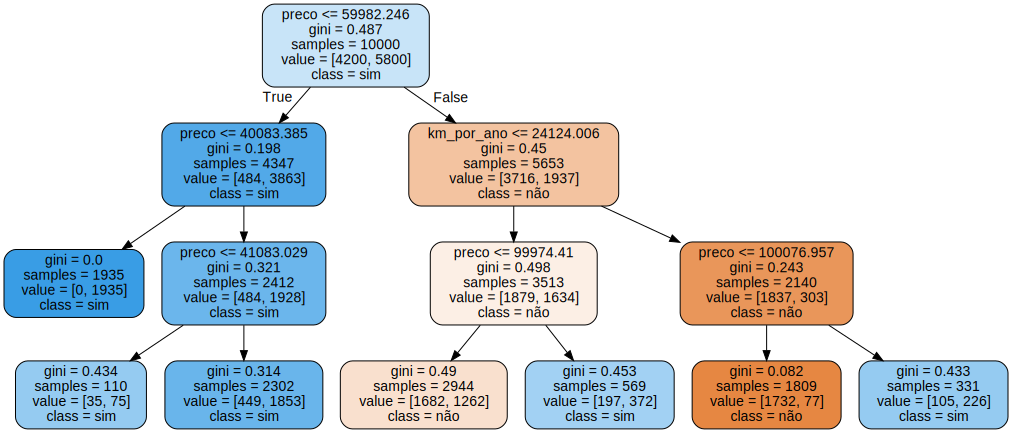

In [37]:
from sklearn.tree import export_graphviz
import graphviz

features = x_azar.columns
dot_data = export_graphviz(melhor, out_file=None, filled=True, rounded=True,
                          class_names=["não","sim"],
                          feature_names = features)
graph = graphviz.Source(dot_data)
graph